# 패키지 로딩

In [2]:
import pandas as pd
import numpy as np

from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

import seaborn as sns

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 데이터 불러오기

In [3]:
df = pd.read_csv('NN1_CRP1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'NN1_CRP1.csv'

In [ ]:
df = pd.read_csv('NN1_CRP2.csv')

In [ ]:
df = pd.read_csv('NN1_CRP3.csv')

In [ ]:
df = pd.read_csv('NN1_CRP4.csv')

In [ ]:
df = pd.read_csv('NN1_CRP5.csv')

In [ ]:
df = pd.read_csv('NN1_CRP6.csv')

In [ ]:
df = pd.read_csv('NN1_CRP7.csv')

In [ ]:
df = pd.read_csv('NN1_CRP8.csv')

In [ ]:
df = pd.read_csv('NN1_CRP9.csv')

In [ ]:
df = pd.read_csv('NN1_CRP10.csv')

In [ ]:
df = pd.read_csv('NN1_CRP11.csv')

In [ ]:
df = pd.read_csv('NN1_CRP12.csv')

In [ ]:
df = pd.read_csv('NN1_CRP13.csv')

In [ ]:
df = pd.read_csv('NN1_CRP14.csv')

In [ ]:
df = pd.read_csv('NN1_CRP15.csv')

# 수익률, Risk (하나의 데이터)

In [3]:
#Maximum Drawdown

def calculate_mdd(return_series):
    # 누적 최대값을 계산
    running_max = return_series.expanding(min_periods=1).max()
    # 현재 값과 누적 최대값의 차이(낙폭)를 계산
    drawdown = running_max - return_series
    # 최대 낙폭을 계산
    mdd = drawdown.max()
    return mdd

In [38]:

# 초기화
percentiles = list(range(1, 11))  # 1%부터 10%까지
result_list = []

for percentile in percentiles:
    # yearmonth 별로 해당 백분위수의 ticker 선택
    top_per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * percentile / 100), 'predict'))
    
    # 'yearmonth' 열의 이름을 변경
    top_per = top_per.rename(columns={'yearmonth': 'yearmonth_grouped'})
    
    # 선택된 ticker들의 실제 수익률 계산(동일비율투자가정, 포폴의 월별수익률)
    average_real_return = top_per.groupby('yearmonth_grouped')['real'].mean()
    
    # 월평균수익률 계산
    mean_return = average_real_return.mean()
    
    # 월누적수익률 계산
    cum_return = (1+average_real_return/100).cumprod() - 1
    cum_return = cum_return.iloc[-1]
    
    
    # 최소수익률(최대손실률)
    min_return = average_real_return.min()
    
    # 표준편차
    std_deviation = average_real_return.std()
    
    # Historical 95% VaR 계산
    var_95 = np.percentile(average_real_return, 5)
    
    #Maximum Drawdown
    cum_cum_return = (1+average_real_return/100).cumprod() - 1
    mdd = calculate_mdd(cum_cum_return)
    
    #Frequency of Loss over 5
    
    
    
    # 결과 저장
    result_list.append({
        'Methodology': 'RF_bayesian',
        'Percentile': f'{percentile}%',
        'Mean Return': mean_return,
        'Min Return': -min_return, ##손실률을 양수로 표현(비교용이를 위해)
        'Cumulative Return': cum_return,
        'Standard Deviation': std_deviation,
        '95% Historical VaR': -var_95, ##손실률을 양수로 표현
        'Maximum Drawdown': mdd
    })

# 결과를 DataFrame으로 정리
result_df = pd.DataFrame(result_list)
# result_df

In [39]:
#결과 저장
result_df.to_csv('cresult_RF_bayesian.csv', index=False)  # index를 저장하지 않음


# 데이터 합치기

In [61]:
#데이터합치기

df1 = pd.read_csv('cresult_elastic_irr_quantile.csv')
df2 = pd.read_csv('cresult_GBRT_bayesian_irr.csv')
df3 = pd.read_csv('cresult_LGBM_irr_quantile.csv')
df4 = pd.read_csv('cresult_LGBMRanker_c_timecv333_return_bayseian.csv')
df5 = pd.read_csv('cresult_NN2_IRR_value.csv')
df6 = pd.read_csv('cresult_OLS3_value.csv')

df7 = pd.read_csv('cresult_OLS_value.csv')
df8 = pd.read_csv('cresult_PCR_irr.csv')
df9 = pd.read_csv('cresult_PLS_irr.csv')

df10 = pd.read_csv('cresult_RF_bayesian.csv')



dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
combined_df = pd.concat(dfs, ignore_index=True)

combined_df

,Methodology,Percentile,Mean Return,Min Return,Cumulative Return,Standard Deviation,95% Historical VaR,Maximum Drawdown
0,elastic_irr_quantile,1%,5.503093,21.621667,230.202411,7.779238,5.210175,54.467337
1,elastic_irr_quantile,2%,4.723352,20.551351,107.512072,7.178732,6.704721,53.488729
2,elastic_irr_quantile,3%,4.471689,18.675893,84.493973,6.921696,5.977100,53.366994
3,elastic_irr_quantile,4%,4.289962,17.156000,71.236138,6.630872,5.739362,51.946216
4,elastic_irr_quantile,5%,4.225910,17.282128,67.107305,6.514307,6.070720,51.351044
...,...,...,...,...,...,...,...,...
95,RF_bayesian,6%,3.882030,16.330187,47.100553,6.485305,6.043339,39.232719
96,RF_bayesian,7%,3.793909,16.256613,42.971401,6.461970,5.865189,38.846842
97,RF_bayesian,8%,3.671300,16.087324,37.875655,6.406590,5.907978,38.367368
98,RF_bayesian,9%,3.539790,16.381250,32.915693,6.407646,5.993011,38.966667


# 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 가정: 'combined_df'는 이미 정의되어 있고, 필요한 데이터가 들어 있다.
# combined_df = pd.read_csv('your_data.csv') # 실제 데이터를 로드하는 경우

# Alpha 값을 문자열로 변환하고 'Methodology'와 함께 멀티인덱스를 생성합니다.
combined_df['Alpha'] = (combined_df['Alpha'] * 100).astype(int).astype(str) + '%'
combined_df.set_index(['Alpha', 'Methodology'], inplace=True)

# 데이터를 히트맵에 맞게 재구성합니다.
mean_return_df = combined_df['Mean Return'].unstack(level=0)
cumulative_return_df = combined_df['Cumulative Return'].unstack(level=0)
standard_deviation_df = combined_df['Standard Deviation'].unstack(level=0)


# 평균수익률

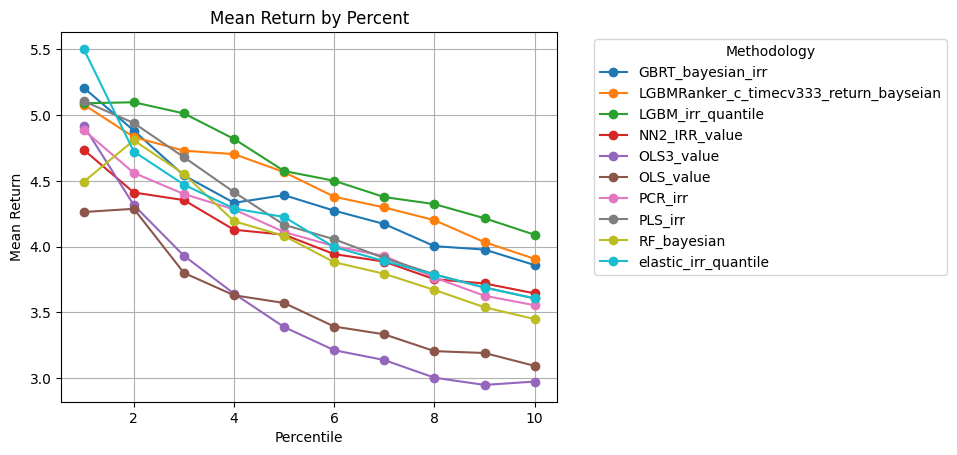

In [62]:
# Percentile 열을 숫자로 변환
combined_df['Percentile'] = combined_df['Percentile'].str.rstrip('%').astype(float)

# Percentile 열을 기준으로 데이터프레임 정렬
final_df = combined_df.sort_values(by='Percentile')

#######평균수익률#######
pivot_df = final_df.pivot(index='Percentile', columns='Methodology', values='Mean Return')



# 그래프 그리기
pivot_df.plot(marker='o', linestyle='-')
plt.xlabel('Percentile')
plt.ylabel('Mean Return')
plt.grid()
plt.title('Mean Return by Percentile')
plt.legend(title='Methodology', loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()

# 최소수익률

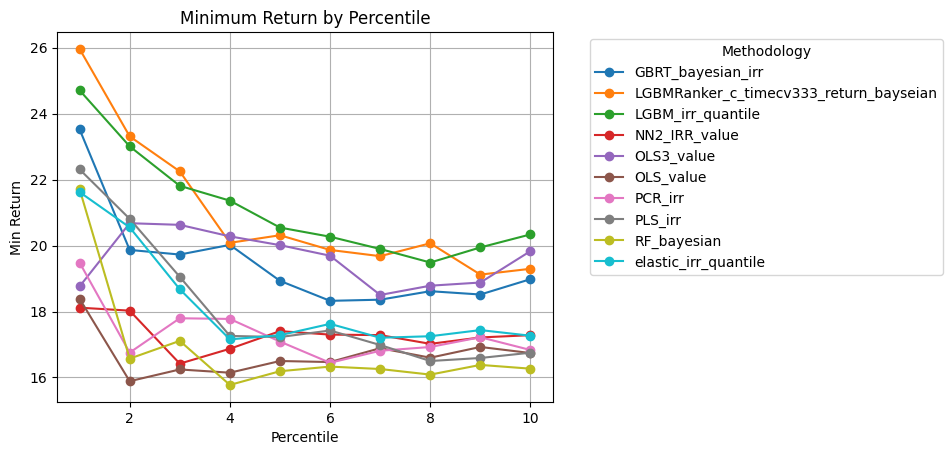

In [50]:
#######최소수익률#######
pivot_df = final_df.pivot(index='Percentile', columns='Methodology', values='Min Return')



# 그래프 그리기
pivot_df.plot(marker='o', linestyle='-')
plt.xlabel('Percentile')
plt.ylabel('Min Return')
plt.grid()
plt.title('Minimum Return by Percent')
plt.legend(title='Methodology', loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()

# 누적수익률

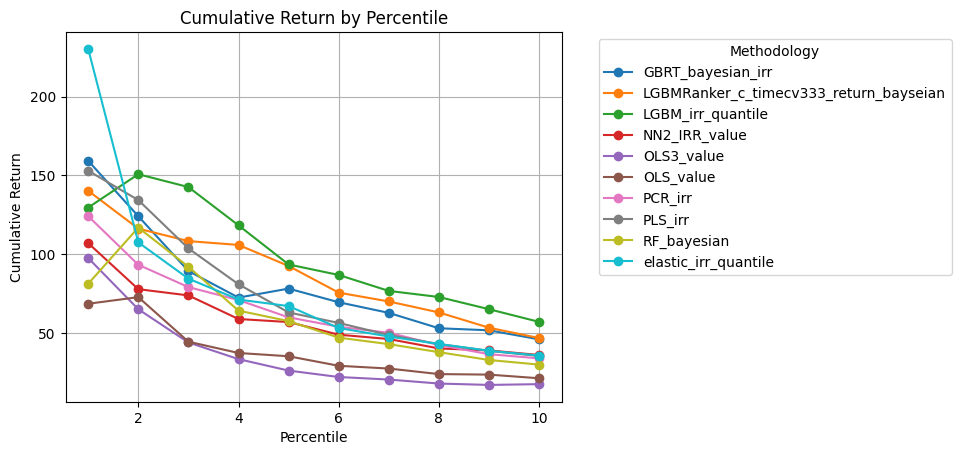

In [43]:
#######누적수익률#######
pivot_df = final_df.pivot(index='Percentile', columns='Methodology', values='Cumulative Return')



# 그래프 그리기
pivot_df.plot(marker='o', linestyle='-')
plt.xlabel('Percentile')
plt.ylabel('Cumulative Return')
plt.grid()
plt.title('Cumulative Return by Percent')
plt.legend(title='Methodology', loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()

# 표준편차 

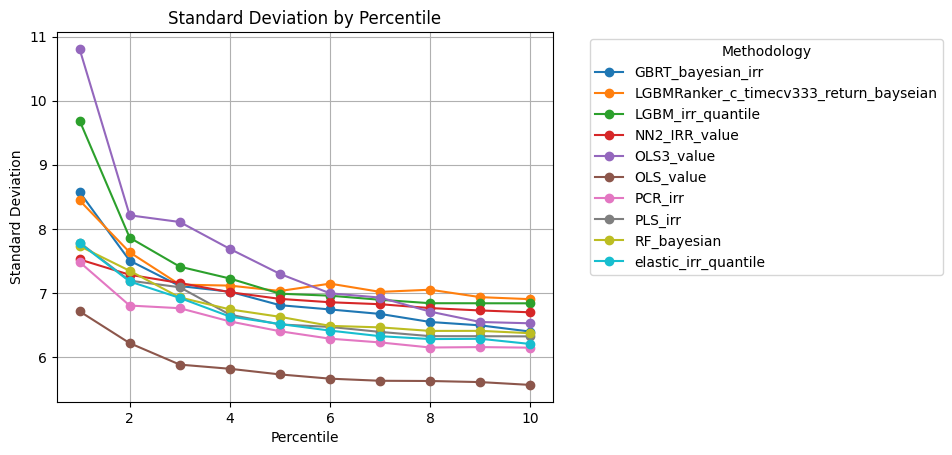

In [47]:
#######표준편차#######


pivot_df = final_df.pivot(index='Percentile', columns='Methodology', values='Standard Deviation')



# 그래프 그리기
pivot_df.plot(marker='o', linestyle='-')
plt.xlabel('Percentile')
plt.ylabel('Standard Deviation')
plt.grid()
plt.title('Standard Deviation by Percent')
plt.legend(title='Methodology', loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()

# 95% Historical VaR

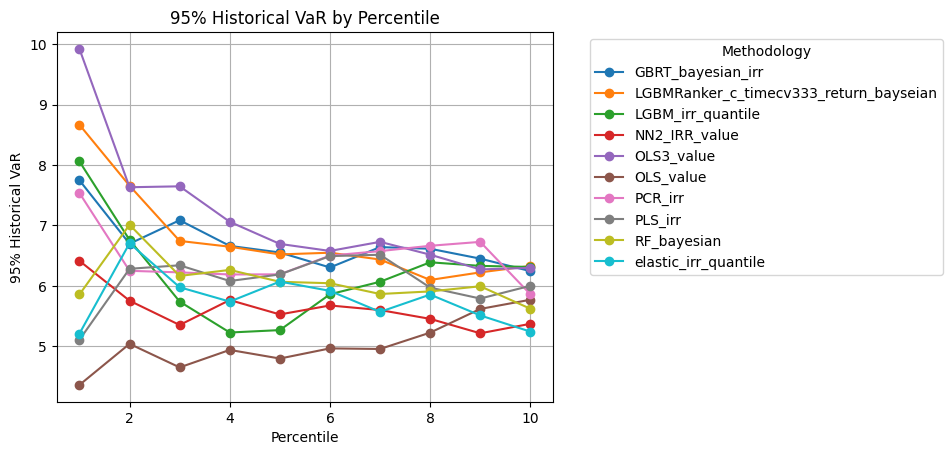

In [49]:
#######95% Historical VaR#######


pivot_df = final_df.pivot(index='Percentile', columns='Methodology', values='95% Historical VaR')



# 그래프 그리기
pivot_df.plot(marker='o', linestyle='-')
plt.xlabel('Percentile')
plt.ylabel('95% Historical VaR')
plt.grid()
plt.title('95% Historical VaR by Percentile')
plt.legend(title='Methodology', loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()

# Maximum Drawdown

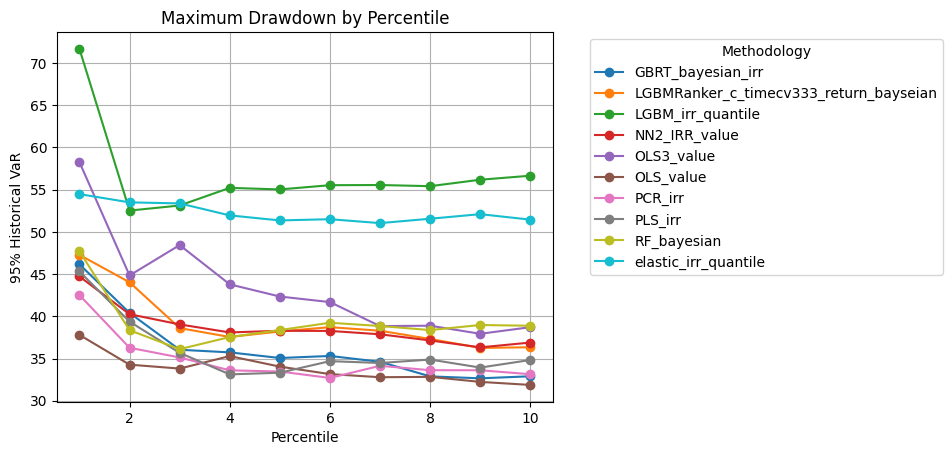

In [63]:
#######95% Historical VaR#######


pivot_df = final_df.pivot(index='Percentile', columns='Methodology', values='Maximum Drawdown')



# 그래프 그리기
pivot_df.plot(marker='o', linestyle='-')
plt.xlabel('Percentile')
plt.ylabel('95% Historical VaR')
plt.grid()
plt.title('Maximum Drawdown by Percentile')
plt.legend(title='Methodology', loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()